In [8]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import Preprocessing

In [6]:
image = cv2.imread(os.path.join('/home/roxane/Desktop/M3_2022/Caterra/dataset_straigt_lines', 'crop_row_023.JPG'))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

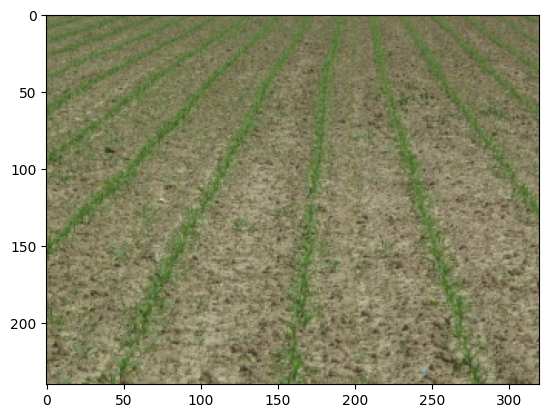

In [7]:
plt.imshow(image)

In [9]:
height_sky, col_veg, av_info = Preprocessing.init(image,1)
vegetation_mask = Preprocessing.get_vegetation_mask(image, height_sky, col_veg, 1, av_info)



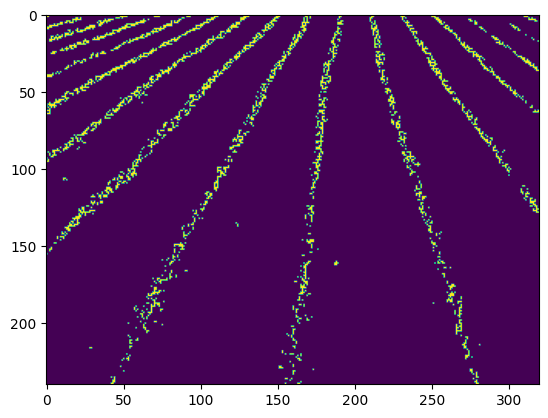

In [10]:
plt.imshow(vegetation_mask)

In [ ]:
accumulator, thetas, rhos = find_acc_hough(mask, angle_acc, outlier):
    """
    input : 2D mask + list containing the angle previously found
    output : accumulator + array to convert theta and rhos to accumulator coordinates
    """

    # Rho and Theta ranges
    thetas = np.deg2rad(np.arange(0, 180)) #maybe dont make it so precise !
    width, height = mask.shape
    diag_len = int(np.ceil(np.sqrt(width * width + height * height)))   # max_dist
    rhos = np.linspace(-diag_len, diag_len, num = diag_len * 2)

    # Cache some resuable values
    cos_t = np.cos(thetas)
    sin_t = np.sin(thetas)

    # Hough accumulator array of theta vs rho
    accumulator = np.zeros((2 * diag_len, len(thetas)), dtype=np.uint64)
    y_idxs, x_idxs = np.nonzero(mask)  

    # Vote in the hough accumulator
    for i in range(len(x_idxs)):
        x = x_idxs[i]
        y = y_idxs[i]

        for t_idx in range(len(thetas)):
            # Calculate rho. diag_len is added for a positive index
            rho = round(x * cos_t[t_idx] + y * sin_t[t_idx]) + diag_len
            accumulator[rho, t_idx] += 1
            if (abs(np.rad2deg(thetas[t_idx])-90)<25): #if horizontale lignes 
                accumulator[:, t_idx] = 0
            
            for angle in angle_acc:
                if (abs(np.rad2deg(thetas[t_idx])-np.rad2deg(angle))<10): #if angle already detected 
                    accumulator[:, t_idx] = 0

            #add here something about outliers 
    
    return accumulator, thetas, rhos